# Inaugural Project

### Group 21

#### By Terese Pasquali, SMV416 and Bettina Juul-Nielsen, NGV557.

Imports and set magics:

In [1]:
#Importing the necessary packages in order to solve the model
import numpy as np # Importing Numpy
from scipy import optimize # Importing Scipy used for in order to optimize the model. 
#Importing the packages used to present the results in question 2. 

%matplotlib inline
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures

#load_ext autoreload #Setting standard setting, that auto reloads our modules. 
#autoreload 2

# local modules
import inauguralproject

# Question 1

To solve the model giving in the problemset, we use scipy.optimizer

We start by defining the utility, which consist of consumption, and a disutility of working.

After that we define the budget constraint, which consist of consumers, cash, the wage, and the taxes paid. In equilibrium, we know the consumer spends all its budget/ ressources on consumption.



In [2]:
#Defining variables, so the model can be constructed.
m=1 #Money
v=10 #Disutility
e=0.3 #Elasicity
tau0=0.4 #Lower tax
tau1=0.1 #Top tax
k=0.4 #Cutoff
w=1 #Wage

# Defining utility function and budget constraint:
def utility(l,c,e,v):
    u=np.log(c)-v*(l**(1+1/e)/(1+1/e))
    return u

def budget(m,w,l,tau0,tau1,k):
    budget=m+w*l-w*l*tau0-tau1*max((w*l-k),0)
    return budget

# Defining a function, setting consumption equal to budget
# We want to optimize the utility. Therefore we set consumption equal to the budget, and makes it return the utility. (negative since scipy only can minimize)
def model(l,w,e,v,tau0,tau1,k):
    c=budget(m,w,l,tau0,tau1,k)
    return -utility(l,c,e,v)

# Defining the optimizer-function. Since the labour is bounded between 0 and 1, the method used is bounded. Th elabour is optimized upon the varibales in the args (all varibles in the args are floats). 
def optimizer(w,e,v,tau0,tau1,k,m):
    solve_l = optimize.minimize_scalar(
        model,method='bounded',
        bounds=(0,1),args=(w,e,v,tau0,tau1,k))


# The optimizer will return the optimal labour, and the optimal consumption and utility will be build upon this.

    l_star = solve_l.x
    c_star = budget(m,w,l_star,tau0,tau1,k)
    u_star = utility(l_star,c_star,e,v)
    return [l_star,c_star,u_star]

# Defning the optiizer-list
l_star = optimizer(w,e,v,tau0,tau1,k,m)[0]
c_star = optimizer(w,e,v,tau0,tau1,k,m)[1]
u_star = optimizer(w,e,v,tau0,tau1,k,m)[2]

def printsolution(w,e,v,tau0,tau1,k,m):
    print(f'Optimal labour supply is: {l_star:.3f}')
    print(f'Optimal consumption is: {c_star:.3f}')
    print(f'returning a utility of: {u_star:.3f}')

printsolution(w,e,v,tau0,tau1,k,m)

Optimal labour supply is: 0.400
Optimal consumption is: 1.240
returning a utility of: 0.172


# Question 2

Now the wagerate will be set between 0.5 and 1.5. in 10.000 observtaions.
Since we shall plot it, we import pyplot, and use the seaborn-colorblind style.

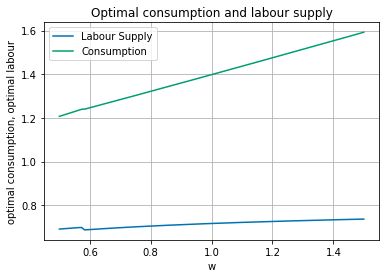

In [25]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

N = 10000
w_vec=np.linspace(0.5,1.5,N)
#Creating vectors for optimal labout and consumption giving wages
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(w_vec):
    bundle=optimizer(w,e,v,tau0,tau1,k,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

#Creating the plot
plt.plot(w_vec, l_vec)
plt.plot(w_vec, c_vec)
plt.grid(True)
plt.xlabel("w")
plt.ylabel("optimal consumption, optimal labour")
plt.legend(["Labour Supply", "Consumption"])
plt.title("Optimal consumption and labour supply")
plt.show()

We see  that both labour and consumption increases as wage increases. But there is a jump in both curves for w=1.  

# Question 3

ADD ANSWER.

In [5]:
N=10000
np.random.seed(2020)
wi_vec=np.random.uniform(0.5,1.5,size=N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimizer(w,e,v,tau0,tau1,k,m)
    l_vec[i]=bundle[0]


tax_rev=lambda l_vec,wi_vec: tau0*wi_vec*l_vec+tau1*np.fmax(wi_vec*l_vec-k,0)
tax=tax_rev(l_vec,wi_vec)
print(tax)
np.sum(tax)

[0.50715955 0.46304062 0.32209523 ... 0.28946898 0.43394289 0.49434736]
The total tax revenue received by the government is: 3181.160


# Question 4

The Frisch elasticity of labour supply captures the elasticity of hours worked to the wage rate. Thereby measures the substitution effect of a change in the wage rate on labor supply. In the function, the elasticity appears as an inverse function, therefore we expect an increase in tax revenue from a decrease in the elasticity of labor supply.

In [15]:
#Defining a new value for the elasticity
e = 0.1
N=10000
np.random.seed(2020)
wi_vec=np.random.uniform(0.5,1.5,size=N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimizer(w,e,v,tau0,tau1,k,m)
    l_vec[i]=bundle[0]


tax_rev=lambda l_vec,wi_vec: tau0*wi_vec*l_vec+tau1*np.fmax(wi_vec*l_vec-k,0)
total_tax_rev=tax_rev(l_vec,wi_vec,)
print(total_tax_rev)
np.sum(total_tax_rev)


[0.50715955 0.46304062 0.32209523 ... 0.28946898 0.43394289 0.49434736]


3181.160000147261

In [6]:
min(l_vec)

0.6871625400152538

In [7]:
max(l_vec)

0.7367083104055421

We see that the labour vector is still within the boundires [0,5:1,5].
By lowering the Frisch elasticity, the substitution effect will be lowered. Therefore we got as expected. 

# Question 5

We investegated the optimal consumptionlevel given labour, and disutiltiy of this. In addition to this the tax revenue was investegated, and the substitution effect on this. The method used for this assignement was mainly the optimize function.  

In [27]:
#Optimerer mht. tau0:
def taxrev(tau0,tau1,wi_vec,l_vec,k):
    
    tax = np.sum(tau_0*wi_vec*l_vec+tau_1*np.fmax(wi_vec*l_vec-kappa,0))
    return -tax

def taxopt(wi_vec,tau1,l_vec,kappa):
    tauopt = optimize.minimize_scalar(
        taxrev,method='bounded',
        bounds=(0,1),args=(tau_1,wi_vec,l_vec,kappa))
    løs = tauopt.x
    return løs

taxopt(tau1,wi_vec,l_vec,kappa)

NameError: name 'kappa' is not defined

# Conclusion